# Arbitrage

In this demonstration, we will be evaluating a statistical arbitrage opportunity for 2 correlated stocks, Coca-Cola (KO) and Pepsi (PEP).

In [1]:
# Import required libraries

import pandas as pd
from pathlib import Path


### Read in the CSV files and examine the DataFrames for both  Coca-Cola (KO) and Pepsi (PEP)

In [2]:
# For KO: Set the path, read in the CSV file using Pandas and review the DataFrame.
file_path = Path('../Resources/KO.csv')

# Read in the CSV as a DataFrame
KO_csv = pd.read_csv(file_path)
KO_csv.info()
KO_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67028 entries, 0 to 67027
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  67028 non-null  object 
 1   open      67028 non-null  float64
 2   high      67028 non-null  float64
 3   low       67028 non-null  float64
 4   close     67028 non-null  float64
 5   volume    67028 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ MB


,DateTime,open,high,low,close,volume
0,2017-01-03 09:30:00-05:00,41.495,41.600,41.475,41.540,15369
1,2017-01-03 09:35:00-05:00,41.530,41.530,41.370,41.380,4129
2,2017-01-03 09:40:00-05:00,41.370,41.390,41.310,41.320,7095
3,2017-01-03 09:45:00-05:00,41.320,41.400,41.320,41.330,8577
4,2017-01-03 09:50:00-05:00,41.340,41.370,41.285,41.370,6836
...,...,...,...,...,...,...
67023,2020-07-31 15:35:00-04:00,46.965,47.015,46.960,46.965,39912
67024,2020-07-31 15:40:00-04:00,46.965,47.005,46.945,46.990,29988
67025,2020-07-31 15:45:00-04:00,47.000,47.125,47.000,47.120,94006
67026,2020-07-31 15:50:00-04:00,47.120,47.140,47.045,47.090,86888


In [3]:
# For PEP: Set the path, read in the CSV file using Pandas and review the DataFrame.
file_path = Path('../Resources/PEP.csv')

# Read in the CSV as a DataFrame
PEP_csv = pd.read_csv(file_path)
PEP_csv.info()
PEP_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68802 entries, 0 to 68801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  68802 non-null  object 
 1   open      68802 non-null  float64
 2   high      68802 non-null  float64
 3   low       68802 non-null  float64
 4   close     68802 non-null  float64
 5   volume    68802 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ MB


,DateTime,open,high,low,close,volume
0,2017-01-03 09:30:00-05:00,104.94,104.95,104.73,104.84,2413
1,2017-01-03 09:35:00-05:00,104.71,104.86,104.60,104.60,500
2,2017-01-03 09:40:00-05:00,104.61,104.61,104.50,104.51,816
3,2017-01-03 09:45:00-05:00,104.56,104.56,104.48,104.48,300
4,2017-01-03 09:50:00-05:00,104.47,104.65,104.47,104.62,1321
...,...,...,...,...,...,...
68797,2020-07-31 15:35:00-04:00,136.77,136.87,136.77,136.85,2676
68798,2020-07-31 15:40:00-04:00,136.78,136.90,136.74,136.90,2956
68799,2020-07-31 15:45:00-04:00,137.12,137.16,136.96,137.16,2585
68800,2020-07-31 15:50:00-04:00,137.19,137.40,137.04,137.33,10280


### Convert the DateTime column from Pandas object to DateTime series & set as the Index

In [4]:
KO_csv['DateTime'] = pd.to_datetime(KO_csv['DateTime'], infer_datetime_format=True, utc=True)
KO_csv['DateTime'] = KO_csv['DateTime'].dt.tz_convert('US/Eastern')
KO_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67028 entries, 0 to 67027
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                     
---  ------    --------------  -----                     
 0   DateTime  67028 non-null  datetime64[ns, US/Eastern]
 1   open      67028 non-null  float64                   
 2   high      67028 non-null  float64                   
 3   low       67028 non-null  float64                   
 4   close     67028 non-null  float64                   
 5   volume    67028 non-null  int64                     
dtypes: datetime64[ns, US/Eastern](1), float64(4), int64(1)
memory usage: 3.1 MB


In [5]:
KO_csv = KO_csv.set_index(KO_csv['DateTime']).drop(columns=['DateTime'])
KO_csv

,open,high,low,close,volume
DateTime,,,,,
2017-01-03 09:30:00-05:00,41.495,41.600,41.475,41.540,15369
2017-01-03 09:35:00-05:00,41.530,41.530,41.370,41.380,4129
2017-01-03 09:40:00-05:00,41.370,41.390,41.310,41.320,7095
2017-01-03 09:45:00-05:00,41.320,41.400,41.320,41.330,8577
2017-01-03 09:50:00-05:00,41.340,41.370,41.285,41.370,6836
...,...,...,...,...,...
2020-07-31 15:35:00-04:00,46.965,47.015,46.960,46.965,39912
2020-07-31 15:40:00-04:00,46.965,47.005,46.945,46.990,29988
2020-07-31 15:45:00-04:00,47.000,47.125,47.000,47.120,94006


In [6]:
PEP_csv['DateTime'] = pd.to_datetime(PEP_csv['DateTime'], infer_datetime_format=True, utc=True)
PEP_csv['DateTime'] = PEP_csv['DateTime'].dt.tz_convert('US/Eastern')
PEP_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68802 entries, 0 to 68801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                     
---  ------    --------------  -----                     
 0   DateTime  68802 non-null  datetime64[ns, US/Eastern]
 1   open      68802 non-null  float64                   
 2   high      68802 non-null  float64                   
 3   low       68802 non-null  float64                   
 4   close     68802 non-null  float64                   
 5   volume    68802 non-null  int64                     
dtypes: datetime64[ns, US/Eastern](1), float64(4), int64(1)
memory usage: 3.1 MB


In [7]:
PEP_csv = PEP_csv.set_index(PEP_csv['DateTime']).drop(columns=['DateTime'])
PEP_csv.info()
PEP_csv

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68802 entries, 2017-01-03 09:30:00-05:00 to 2020-07-31 15:55:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    68802 non-null  float64
 1   high    68802 non-null  float64
 2   low     68802 non-null  float64
 3   close   68802 non-null  float64
 4   volume  68802 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.1 MB


,open,high,low,close,volume
DateTime,,,,,
2017-01-03 09:30:00-05:00,104.94,104.95,104.73,104.84,2413
2017-01-03 09:35:00-05:00,104.71,104.86,104.60,104.60,500
2017-01-03 09:40:00-05:00,104.61,104.61,104.50,104.51,816
2017-01-03 09:45:00-05:00,104.56,104.56,104.48,104.48,300
2017-01-03 09:50:00-05:00,104.47,104.65,104.47,104.62,1321
...,...,...,...,...,...
2020-07-31 15:35:00-04:00,136.77,136.87,136.77,136.85,2676
2020-07-31 15:40:00-04:00,136.78,136.90,136.74,136.90,2956
2020-07-31 15:45:00-04:00,137.12,137.16,136.96,137.16,2585


### Plotting KO and PEP

<AxesSubplot:xlabel='DateTime'>

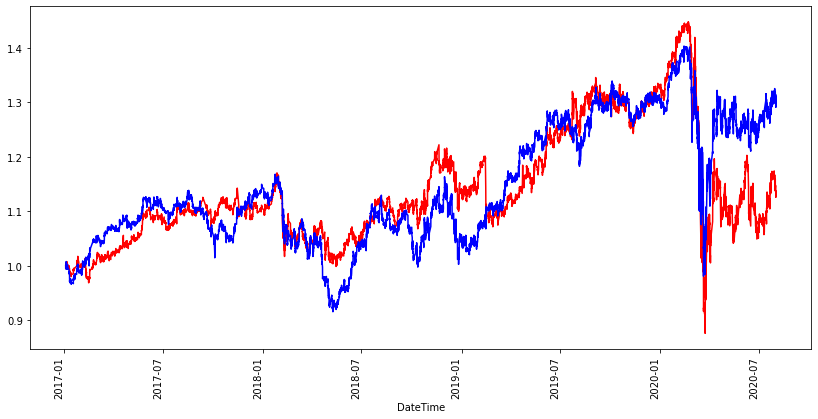

In [8]:
# Normalizing both KO & PEP so the first date starts at a price of 1, plot both dataframes


Per the graph, KO and PEP appear to, for the most part, move in tandem with a consistent spread. At the surface, it also appears that PEP is the more volatile of the 2 stocks. It appears that there are periods where PEP takes a big dip, but eventually works its way back into line.

This illustrates the concept of **reversion to the mean**, and it underlies a possible statistical arbitrage opportunity. Buying PEP after a big down move might indicate a buying opportunity. The purchase of PEP is offset with a short-sale of KO to keep the position market-neutral with the intention of minimizing market risk. 

### KO vs PEP for 2018 - A closer look

<AxesSubplot:xlabel='DateTime'>

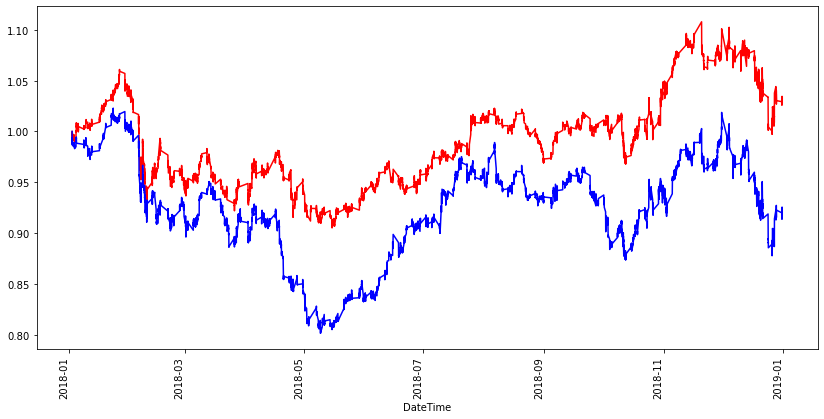

In [9]:
# Plotting 2018, again normaling both dataframes


Honing in on just 2018, the trend seems to hold. When PEP dips and the realative spread between the two narrows, PEP seems to outperform.

A firm that plays in statistical arbitrage would establish very quantative criteria around this trend and then execute their pairs trade, that is, buy Pepsi and sell short an equivalent dollar amount of KO. These positions would be held for a very short amount of time, a few hours to a few days. The unwind would likely be triggered by another quantatively-based signal. 

### Gain/Loss Calculation Example

### PEP Purchase

Below we will calculate the resulting gain or loss from purchasing 1 share of PEP at the open on 6/20 and selling it at the close on 6/22. The gain/loss is calculated by subtracting the money paid out on the purchase from the money received on the sale. 

In [10]:
# PEP purchase


2.6799999999999926

### KO Short-sale

KO is being sold short to reduce market exposure. In our calculation, we will sell 2.5 shares of KO (the cost of 1 share of PEP is 2.5 times that of KO) to keep the dollar-exposure neutral as well. Calculating the gain loss will involve subtracting the money paid out on the purchase to cover our short sale from the money received from the short sale of KO.

In [11]:
# KO short sale - 2 shares sold short to keep it dollar-neutral


1.0125000000000028

In this case, the stat-arb trader would have gotten lucky. Money was made on both sides of the trade as the price of PEP increased, which made money on the long positon, while the price of KO decreased to yield a gain on the short position. 

In the real world, this trade would have been considerably larger, with much more quantative analysis coming into play. 

In [12]:
# Calculate net gain/loss


3.6924999999999955

## Conslusion

Overall, arbitrage seeks to take advantage of a short-term price dislocation between identical or correlated assets. 

FinTech firms and their sophisticated algorithmic models now scour world-wide markets searching out arbitrage opportunities. These same computer programs are also largely responsible for the trade execution.  

It is a dynamic and exciting area at the intersection of FinTech and trading. 